In [2491]:
# Załadowanie bibliotek, oraz danych

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2492]:
# Dodanie kolumny z rodzajem kwiatu

df['target'] = iris.target

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2493]:
# Podzielenie danych na X i y

X = df.drop(['variety'], axis=1)
y = df['variety']

In [2494]:
# Podzielenie danych na dane treningowe, oraz na dane testowe

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [2495]:
# Przeskalowanie danych

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [2496]:
# Nakarmienie modelu danymi treningowymi

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [2497]:
# Wykonanie przewidywań na wyuczonym modelu

y_pred = gnb.predict(X_test)

In [2498]:
# Sprawdzenie dokładności, oraz testowanie czy istnieje overfitting lub underfitting

print('Wynik danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Wynik danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))

Wynik danych treningowych: 0.9619
Wynik danych testowych: 0.9778


In [2499]:
# Obliczenie precyzji modelu

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average=None)

print("Precyzja dla każdej klasy:", precision)

Precyzja dla każdej klasy: [1.         0.93333333 1.        ]


<Axes: >

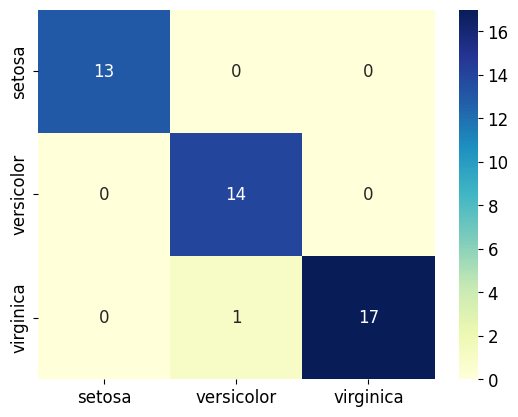

In [2500]:
# Wykorzystanie macierzy konfuzji do narysowania wykresu ciepłowego

from sklearn.metrics import confusion_matrix

class_names = iris.target_names

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=class_names, index=class_names)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [2501]:
# Zapisanie pierwszych 10 prawdopodobieństw do dataframe'u

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=[class_names])

y_pred_prob_df

,setosa,versicolor,virginica
0,6.895385e-74,9.984179e-01,1.582142e-03
1,1.314925e-29,9.999990e-01,1.019120e-06
2,3.010383e-173,1.247905e-06,9.999988e-01
3,1.000000e+00,5.355845e-20,7.223937e-26
4,3.666165e-274,3.627054e-12,1.000000e+00
5,2.089708e-252,1.502124e-11,1.000000e+00
6,2.298344e-92,9.811286e-01,1.887139e-02
7,8.012243e-42,9.999941e-01,5.880291e-06
8,1.723686e-181,2.122313e-05,9.999788e-01
9,1.000000e+00,4.044886e-18,1.172784e-23


Text(0, 0.5, 'Liczba próbek')

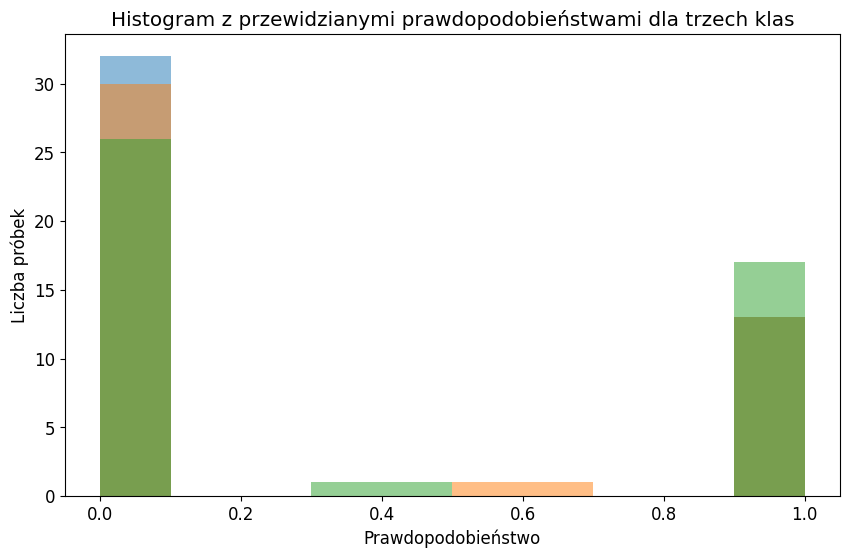

In [2502]:
# Przypisz prawdopodobieństwa i narysuj wykresy

y_pred_setosa = gnb.predict_proba(X_test)[:, 0]
y_pred_versicolor = gnb.predict_proba(X_test)[:, 1]
y_pred_virginica = gnb.predict_proba(X_test)[:, 2]

plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))

plt.hist(y_pred_setosa, bins=10, alpha=0.5, label='Setosa')

plt.hist(y_pred_versicolor, bins=10, alpha=0.5, label='Versicolor')

plt.hist(y_pred_virginica, bins=10, alpha=0.5, label='Virginica')

plt.title('Histogram z przewidzianymi prawdopodobieństwami dla trzech klas')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Liczba próbek')



Wyniki walidacji krzyżowej:[0.81818182 1.         0.90909091 1.         1.         1.
 0.9        1.         0.9        0.9       ]
Średni wynik walidacji krzyżowej: 0.9427


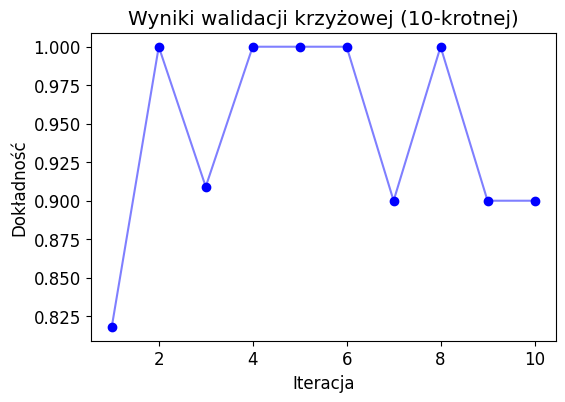

In [2503]:
# Wykorzystanie walidacji krzyżowej, oraz rysowanie jej wykresu

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')

print('Wyniki walidacji krzyżowej:{}'.format(scores))

print('Średni wynik walidacji krzyżowej: {:.4f}'.format(scores.mean()))

plt.figure(figsize=(6, 4))
plt.scatter(range(1, len(scores) + 1), scores, color='blue')
plt.plot(range(1, len(scores) + 1), scores, color='blue', alpha=0.5)
plt.title('Wyniki walidacji krzyżowej (10-krotnej)')
plt.xlabel('Iteracja')
plt.ylabel('Dokładność')
plt.show()

